In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to download dataset from internet
import opendatasets as od

# textblob for sentiment polarity
from textblob import TextBlob

In [44]:
py.offline.init_notebook_mode(connected=True)

# Ideas in the dataset

## Classification: 
        Can you predict the patient's condition based on the review?
        
## Regression: 
        Can you predict the rating of the drug based on the review?
        
## Sentiment analysis: 
        What elements of a review make it more helpful to others? Which patients tend to have more negative reviews? Can you determine if a review is positive, neutral, or negative?
        
## Data visualizations: 
        What kind of drugs are there? What sorts of conditions do these patients have?

In [4]:
# download dataset from Kaggle
url = "https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018"
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vasanth12
Your Kaggle Key: ········


  0%|                                                                                                                                      | 0.00/40.7M [00:00<?, ?B/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40.7M/40.7M [00:33<00:00, 1.27MB/s]


In [7]:
data = pd.read_csv('./kuc-hackathon-winter-2018/drugsComTrain_raw.csv')
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [8]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [10]:
data.drop(labels=['uniqueID', 'date'], axis=1, inplace=True)

In [11]:
# data.isna().sum()
# data.count()
data.dropna(subset=['condition'], inplace=True)
data.count()

drugName       160398
condition      160398
review         160398
rating         160398
usefulCount    160398
dtype: int64

In [12]:
# data['drugName'].nunique()
data['drugName'].value_counts()

Levonorgestrel                       3631
Etonogestrel                         3321
Ethinyl estradiol / norethindrone    2750
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2033
                                     ... 
Colace                                  1
DermaZinc Shampoo                       1
Lillow                                  1
Magaldrate / simethicone                1
Grifulvin V                             1
Name: drugName, Length: 3431, dtype: int64

In [13]:
# data['condition'].nunique()
data['condition'].value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

### Correlation between rating and usefulcount

In [14]:
rating_usefulcount = {
    "rating": data['rating'],
    "usefulcount": data['usefulCount']
}
df = pd.DataFrame(rating_usefulcount)

df.corr()

,rating,usefulcount
rating,1.000000,0.234379
usefulcount,0.234379,1.000000


In [15]:
# adding polarity of the reviews to the data
def getPolarity(text):
    res = TextBlob(text)
    return res.sentiment.polarity

data['polarity'] = data['review'].apply(getPolarity)

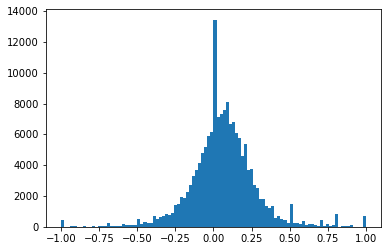

In [16]:
x = data['polarity']
plt.hist(x, bins=100)
plt.show()

### Correlation between polarity and rating

In [27]:
df = {
    "rating": data['rating'],
    "polarity": data['polarity']
}

df = pd.DataFrame(df)
df.corr()

,rating,polarity
rating,1.000000,0.348701
polarity,0.348701,1.000000


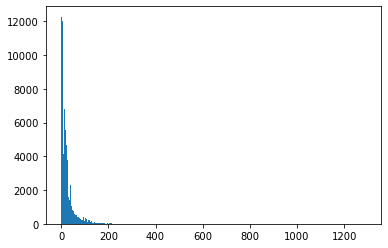

In [17]:
x = data['usefulCount']
plt.hist(x, bins=1000)
plt.show()

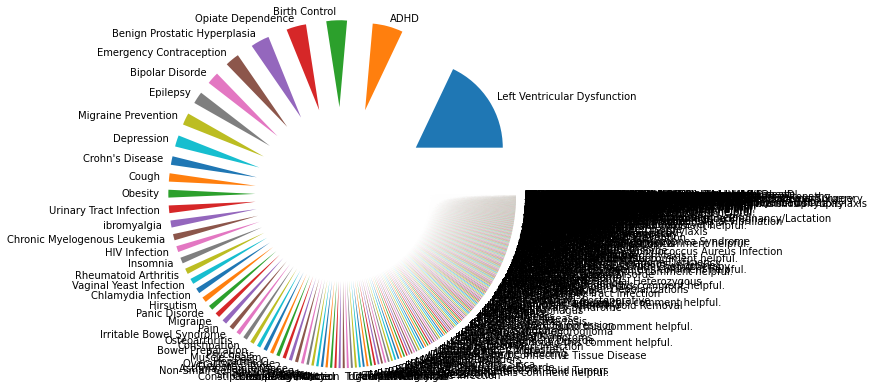

In [18]:
x = data['condition'].unique()
y = data['condition'].value_counts()

n = data['condition'].nunique()
explodes = np.ones(n)

plt.pie(y, labels=x, explode=explodes)
plt.show()

In [19]:
x = data['condition'].value_counts()

x['Birth Control']

28788

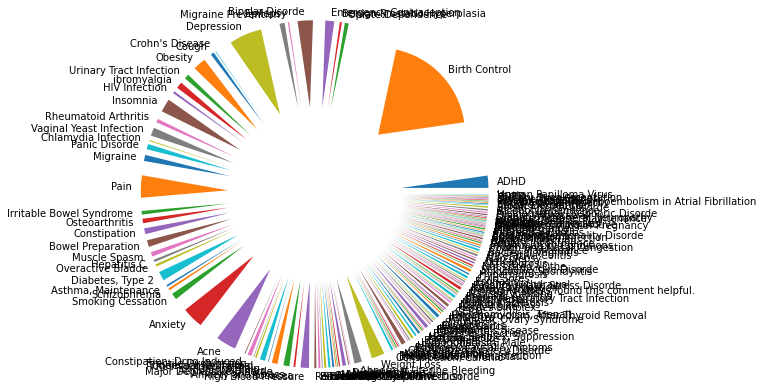

In [20]:
uniqueCondition = data['condition'].unique().tolist()
conditionOccurance = data['condition'].value_counts()

x = []
y = []
for i in uniqueCondition:
    if conditionOccurance[i] > 100:
        x.append(i)
        y.append(conditionOccurance[i])
        
explodes = np.ones(len(x))
plt.pie(y, labels=x, explode=explodes)
plt.show()

### condition to drugName mapping

In [21]:
condToDrugMapping = {}

for cond in uniqueCondition:
    condToDrugMapping[cond] = data[data['condition'] == cond]['drugName'].unique()

In [22]:
data[data['condition'] == 'Birth Control']['drugName'].unique().shape

(172,)

In [23]:
uniqueDrugs = data['drugName'].unique().tolist()

In [24]:
drugToConditionMapping = {}

for drug in uniqueDrugs:
    drugToConditionMapping[drug] = data[data['drugName'] == drug]['condition'].unique()

In [110]:
rows = data[data['condition'] == 'Birth Control']
rows['drugName'].unique().shape

(172,)

In [1]:
import re
from emoticon import EMOTICON_MAPPING
from contraction_expansion import CONTRACTION_MAP

In [ ]:
constractionExpansion =re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())), flags=re.IGNORECASE|re.DOTALL)
htmlTags = re.compile('<.+?>')
specialCharacters = re.compile(r'[^\w^\s]')

In [ ]:
def textPreprocessingPipeline(text):
    # replacing emoticons
    # Need to work on text
    
    # text expansion like isn't -> is not  
    # execute "constractionExpansion" to see what are they
    constractionExpansion.sub(lambda x:CONTRACTION_MAP[x.group()], text)
    
    # HTML and XML tags
    htmlTags.sub('', text)
    
    # HTML entities
    
    # lower case
    text = text.lower()
    
    # numbers
    
    # idioms and phrases
    
    # remove special characters
    specialCharacters.sub('', text)
    
    # lemmatization
    
    yield text
    

In [ ]:
def textVisualization():
    # total count of classes/labes
    
    # 
    
    # Sentence length distribution
    
    # polarity
    
    # 

In [26]:
data['review'].tolist()

['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
 '"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."',
 '"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormo

In [9]:
re.purge()

In [1]:
import re
from emoticon import EMOTICON_MAPPING
from contraction_expansion import CONTRACTION_MAP

In [10]:
constractionExpansion =re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())), flags=re.IGNORECASE|re.DOTALL)

In [11]:
constractionExpansion

re.compile(r"(ain't|aren't|can't've|can't|'cause|could've|couldn't've|couldn't|didn't|doesn't|don't|hadn't've|hadn't|hasn't|haven't|he'd've|he'd|he'll've|he'll|he's|how'd'y|how'd|how'll|how's|I'd've|I'd|I'll've|I'll|I'm|I've|i'd've|i'd|i'll've|i'll|i'm|i've|isn't|it'd've|it'd|it'll've|it'll|it's|let's|ma'am|mayn't|might've|mightn't've|mightn't|must've|mustn't've|mustn't|needn't've|needn't|o'clock|oughtn't've|oughtn't|shan't've|shan't|sha'n't|she'd've|she'd|she'll've|she'll|she's|should've|shouldn't've|shouldn't|so've|so's|that'd've|that'd|that's|there'd've|there'd|there's|they'd've|they'd|they'll've|they'll|they're|they've|to've|wasn't|we'd've|we'd|we'll've|we'll|we're|we've|weren't|what'll've|what'll|what're|what's|what've|when's|when've|where'd|where's|where've|who'll've|who'll|who's|who've|why's|why've|will've|won't've|won't|would've|wouldn't've|wouldn't|y'all'd've|y'all'd|y'all're|y'all've|y'all|you'd've|you'd|you'll've|you'll|you're|you've)",
re.IGNORECASE|re.DOTALL|re.UNICODE)

In [12]:
constractionExpansion.sub(lambda x:CONTRACTION_MAP[x.group()], r"you'd or i'd've done well")

'you would or i would have done well'

In [7]:
def tempfunc(abc):
    match = abc.group(0)
    print(match)
    first_char = match[0]
    print(first_char)
    expanded_contraction = CONTRACTION_MAP.get(match)\
                            if CONTRACTION_MAP.get(match) \
                            else CONTRACTION_MAP.get(match.lower())
    
    return expanded_contraction

In [8]:
constractionExpansion.sub(tempfunc, "you'd or i'd've done well")

you'd
y
've
'
i'd
i
've
'


'you wouldhave or i wouldhave done well'

In [38]:
constractionExpansion.match("you'd've")

<re.Match object; span=(0, 8), match="you'd've">

In [ ]:
match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]

In [13]:
emoticonSymbols = re.compile('|'.join(EMOTICON_MAPPING.keys()),flags=re.IGNORECASE|re.DOTALL)

error: unbalanced parenthesis at position 2

In [7]:
emoticonSymbols

re.compile(r'>\-\)\|O:\)', re.IGNORECASE|re.DOTALL|re.UNICODE)

In [22]:
def emoticonsMatch(emoticon):
    match = emoticon.group(0)
    return EMOTICON_MAPPING[match]

In [11]:
emoticonSymbols.findall('>-) O:)')

[]

In [12]:
emoticonSymbols.sub(lambda x:EMOTICON_MAPPING.get(x.group()), r'>-) are O:)')

'>-) are O:)'

In [17]:
htmlTags = re.compile('<.+?>')
htmlTags
htmlTags.sub('', "<div> Hi, this is to rem<b>ove<b> html tags </div>")

' Hi, this is to remove html tags '

In [30]:
specialCharacters = re.compile(r'[^\w^\s]')
specialCharacters
specialCharacters.sub('', "QWERT@#$%^ yuiop*()_cvbnm] [;',.:""']")

'QWERT^ yuiop_cvbnm '

In [15]:
import nltk
from nltk import word_tokenize
text = word_tokenize("This is a tagged sentence")
print(nltk.pos_tag(text))

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('tagged', 'JJ'), ('sentence', 'NN')]


In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("This is a tagged sentence")
tags = []
for token in doc:
    tags.append((token.pos_, token))
print(tags)

[('PRON', This), ('AUX', is), ('DET', a), ('ADJ', tagged), ('NOUN', sentence)]


In [17]:
#In textblob
from textblob import TextBlob
text = TextBlob("This is a tagged sentence")
print(text.tags)

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('tagged', 'JJ'), ('sentence', 'NN')]
